In [1]:
import numpy as np
import pandas as pd
%pylab inline
from datetime import datetime
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
traffic = pd.read_csv('ukTrafficAADF.csv', low_memory=False)

In [3]:
traffic.columns.values

array(['AADFYear', 'CP', 'Estimation_method',
       'Estimation_method_detailed', 'Region', 'LocalAuthority', 'Road',
       'RoadCategory', 'Easting', 'Northing', 'StartJunction',
       'EndJunction', 'LinkLength_km', 'LinkLength_miles', 'PedalCycles',
       'Motorcycles', 'CarsTaxis', 'BusesCoaches', 'LightGoodsVehicles',
       'V2AxleRigidHGV', 'V3AxleRigidHGV', 'V4or5AxleRigidHGV',
       'V3or4AxleArticHGV', 'V5AxleArticHGV', 'V6orMoreAxleArticHGV',
       'AllHGVs', 'AllMotorVehicles', 'Lat', 'Lon'], dtype=object)

In [4]:
traffic['Total Vehicles'] = traffic['PedalCycles'] + traffic['Motorcycles'] + traffic['CarsTaxis'] + traffic['BusesCoaches'] + traffic['LightGoodsVehicles'] + traffic['V2AxleRigidHGV'] + traffic['V3AxleRigidHGV']  + traffic['V4or5AxleRigidHGV'] + traffic['V3or4AxleArticHGV'] + traffic['V5AxleArticHGV'] ++ traffic['V6orMoreAxleArticHGV'] + traffic['AllHGVs'] + traffic['AllMotorVehicles']

In [5]:
traffic05_14 = traffic [ (traffic['AADFYear'] == 2005) | (traffic['AADFYear'] == 2006) | (traffic['AADFYear'] == 2007) | (traffic['AADFYear'] == 2009) | (traffic['AADFYear'] == 2010) | (traffic['AADFYear'] == 2011) | (traffic['AADFYear'] == 2012) | (traffic['AADFYear'] == 2013) | (traffic['AADFYear'] == 2014)]

In [6]:
traffic05_14.reset_index().drop('index', axis=1, inplace=True)

In [7]:
traffic_YearWise = traffic05_14.groupby('AADFYear')['Total Vehicles'].agg('sum')

In [8]:
distance = traffic05_14.groupby('AADFYear')['LinkLength_km'].agg('sum')

In [9]:
distance

AADFYear
2005    44981.58
2006    45065.95
2007    45027.05
2009    45041.50
2010    44981.20
2011    45020.80
2012    45089.41
2013    45115.98
2014    45150.08
Name: LinkLength_km, dtype: float64

In [10]:
traff_perc =(traffic_YearWise/sum(traffic_YearWise))*100

In [13]:
# Reading csv files corresponding to different years to 3 dataframes and dropping duplicates
accidents_12_14 = pd.read_csv('accidents_2012_to_2014.csv', low_memory=False)
accidents_09_11 = pd.read_csv('accidents_2009_to_2011.csv', low_memory=False)
accidents_05_07 = pd.read_csv('accidents_2005_to_2007.csv', low_memory=False)
accidents_12_14 = accidents_12_14.drop_duplicates()
accidents_09_11 = accidents_09_11.drop_duplicates()
accidents_05_07 = accidents_05_07.drop_duplicates()

In [14]:
# Concatenating 3 data frames to a single one
accidents = pd.concat([accidents_05_07, accidents_09_11, accidents_12_14])

In [15]:
accidents.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005


In [16]:
accidents.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [17]:
accidents['Accident_Severity'].replace([1, 2, 3],['Fatal', 'Severe', 'Slight'], inplace=True)
accidents['Day_of_Week'].replace([1,2,3,4,5,6,7],['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], inplace=True)

In [18]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469995 entries, 0 to 464696
Data columns (total 33 columns):
Accident_Index                                 1469995 non-null object
Location_Easting_OSGR                          1469894 non-null float64
Location_Northing_OSGR                         1469894 non-null float64
Longitude                                      1469894 non-null float64
Latitude                                       1469894 non-null float64
Police_Force                                   1469995 non-null int64
Accident_Severity                              1469995 non-null object
Number_of_Vehicles                             1469995 non-null int64
Number_of_Casualties                           1469995 non-null int64
Date                                           1469995 non-null object
Day_of_Week                                    1469995 non-null object
Time                                           1469878 non-null object
Local_Authority_(District)         

In [19]:
# Deleted the column with NO details
accidents.drop('Junction_Detail', axis=1, inplace=True)

# Filling NA values for location as 0.0
accidents['Location_Easting_OSGR'].fillna(0.0, inplace=True)
accidents['Location_Northing_OSGR'].fillna(0.0, inplace=True)
accidents['Longitude'].fillna(0.0, inplace=True)
accidents['Latitude'].fillna(0.0, inplace=True)

In [20]:
# Filling missing values for categorical variables
accidents['Junction_Control'].fillna('Unknown', inplace=True)
accidents['Pedestrian_Crossing-Human_Control'].fillna('Unknown', inplace=True)
accidents['Pedestrian_Crossing-Physical_Facilities'].fillna('Unknown', inplace=True)
accidents['Weather_Conditions'].fillna('Unknown', inplace=True)
accidents['Road_Surface_Conditions'].fillna('Unknown', inplace=True)
accidents['Special_Conditions_at_Site'].fillna('Unknown', inplace=True)
accidents['Carriageway_Hazards'].fillna('Unknown', inplace=True)
accidents['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Unknown', inplace=True)
accidents['LSOA_of_Accident_Location'].fillna('Unknown', inplace=True)

In [21]:
# Find the mean value of the Hour in Time colums
t = accidents['Time'].map(str).map(lambda x: x.split(':')[0])
t = t[t != 'nan'].map(int)
int(ceil(t.mean()))

14

In [22]:
# Adding a new column 'hour' and replacing the 'nans' with the mean value
accidents['Hour'] = accidents['Time'].map(str).map(lambda x: x.split(':')[0])
accidents['Hour'].replace('nan', 14, inplace= True)
accidents['Hour'] = accidents['Hour'].map(int)
accidents.drop('Time', inplace=True, axis=1)

In [23]:
# Converting Date column into Date time
accidents['Date'] = pd.to_datetime(accidents['Date'], dayfirst=True)

In [24]:
# Function to check if the weather is windy or not
def isWindy(weather):
    if 'with high winds' in weather:
        return 'Yes'
    elif 'without high winds' in weather:
        return 'No'
    else:
        return "Unknown"

In [25]:
# Adding a new column to capture the effect of wind separately
accidents['Wind'] = accidents['Weather_Conditions'].map(isWindy)

In [26]:
# Splitting Weather Conditions and taking the first word. Adding a new column
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].map(lambda x: x.split()[0])
accidents['Weather_Conditions'].replace('Other', 'Unknown', inplace=True)

In [27]:
accidents = accidents.reset_index().drop('index', axis=1)

In [28]:
accidents.shape

(1469995, 33)

In [29]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469995 entries, 0 to 1469994
Data columns (total 33 columns):
Accident_Index                                 1469995 non-null object
Location_Easting_OSGR                          1469995 non-null float64
Location_Northing_OSGR                         1469995 non-null float64
Longitude                                      1469995 non-null float64
Latitude                                       1469995 non-null float64
Police_Force                                   1469995 non-null int64
Accident_Severity                              1469995 non-null object
Number_of_Vehicles                             1469995 non-null int64
Number_of_Casualties                           1469995 non-null int64
Date                                           1469995 non-null datetime64[ns]
Day_of_Week                                    1469995 non-null object
Local_Authority_(District)                     1469995 non-null int64
Local_Authority_(Highway)  

In [ ]:
# All nulls have been removed
accidents.isna().any().sum()

In [ ]:
# accidents.to_csv('accidents.csv')

In [30]:
accidents_YearWise = accidents['Year'].value_counts().sort_index()
accidents_perc = (accidents_YearWise/sum(accidents_YearWise)) * 100

In [31]:
traffic = pd.read_csv('ukTrafficAADF.csv', low_memory=False)

traffic.columns.values

traffic['Total Vehicles'] = traffic['PedalCycles'] + traffic['Motorcycles'] + traffic['CarsTaxis'] + traffic['BusesCoaches'] + traffic['LightGoodsVehicles'] + traffic['V2AxleRigidHGV'] + traffic['V3AxleRigidHGV']  + traffic['V4or5AxleRigidHGV'] + traffic['V3or4AxleArticHGV'] + traffic['V5AxleArticHGV'] ++ traffic['V6orMoreAxleArticHGV'] + traffic['AllHGVs'] + traffic['AllMotorVehicles']

traffic05_14 = traffic [ (traffic['AADFYear'] == 2005) | (traffic['AADFYear'] == 2006) | (traffic['AADFYear'] == 2007) | (traffic['AADFYear'] == 2009) | (traffic['AADFYear'] == 2010) | (traffic['AADFYear'] == 2011) | (traffic['AADFYear'] == 2012) | (traffic['AADFYear'] == 2013) | (traffic['AADFYear'] == 2014)]

traffic05_14.reset_index().drop('index', axis=1, inplace=True)

traffic_YearWise = traffic05_14.groupby('AADFYear')['Total Vehicles'].agg('sum')
traff_perc =(traffic_YearWise/sum(traffic_YearWise))*100

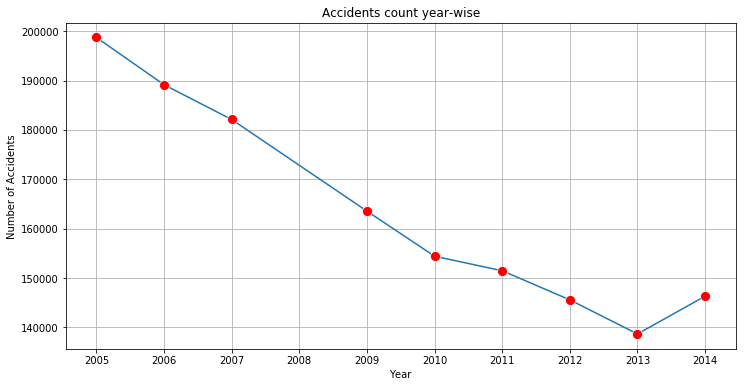

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(data=accidents_YearWise, marker='o', markerfacecolor='red', dashes=False, markersize=10)
plt.title('Accidents count year-wise')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(list(range(2005,2015)))
plt.grid()

Text(0,0.5,'Accident %')

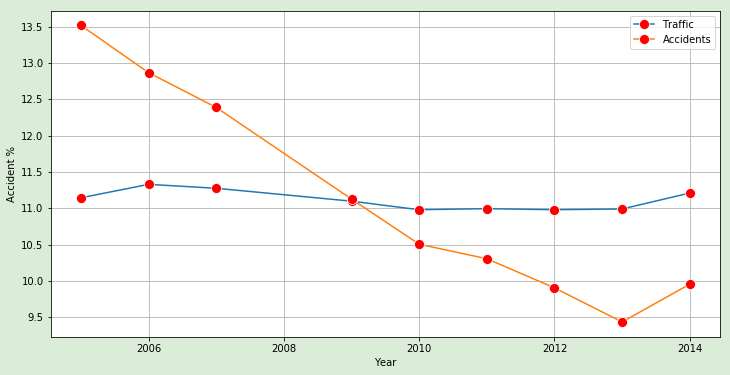

In [33]:
plt.figure(figsize=(12,6), facecolor='#DBEDD8')
sns.lineplot(data=traff_perc, marker='o', markerfacecolor='red', dashes=False, markersize=10, label='Traffic')
sns.lineplot(data=accidents_perc, marker='o', markerfacecolor='red', dashes=False, markersize=10, label='Accidents')
plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Accident %')

# Here we can see that accidents with low severity dominates in count

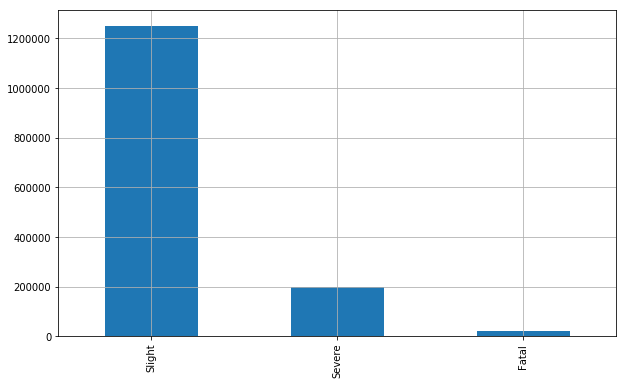

In [34]:
plt.figure(figsize=(10,6))
accidents['Accident_Severity'].value_counts().plot(kind='bar')
plt.grid()

In [35]:
severity_count = accidents['Accident_Severity'].value_counts()

Text(0.5,1,'Accident Severity')

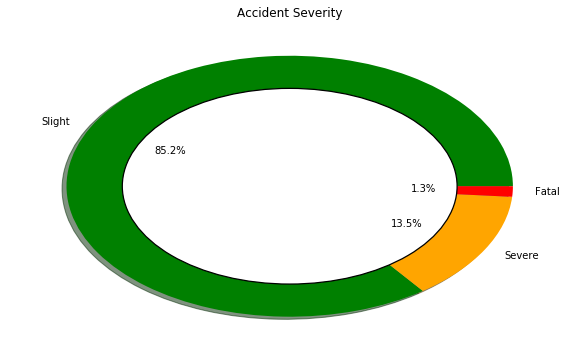

In [37]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange', 'red']
labels = ['Slight', 'Severe', 'Fatal']
plt.pie(severity_count, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Accident Severity')

We will now analyze the trend of the severe and fatal accidents

In [38]:
severe_accidents = accidents[(accidents['Accident_Severity'] == 'Fatal') | (accidents['Accident_Severity'] == 'Severe')]

In [39]:
severe_accidents['Accident_Severity'].value_counts()

Severe    198920
Fatal      19041
Name: Accident_Severity, dtype: int64

Trend of Severe and Fata Accidents across years

In [40]:
fatal_severe_yearwise = pd.pivot_table(severe_accidents, index='Year', columns='Accident_Severity', values='Accident_Index', aggfunc='count')

Text(0.5,1,'Severe Accidents')

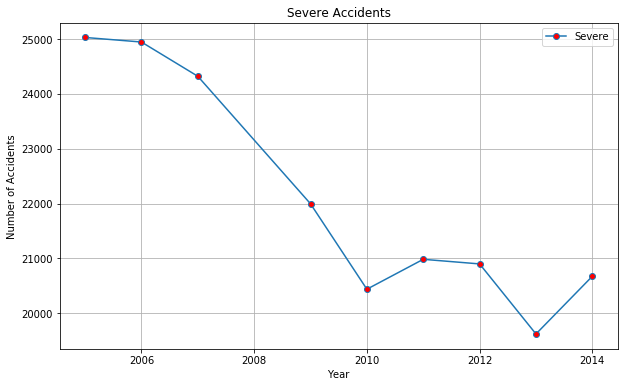

In [41]:
plt.figure(figsize=(10,6))
plot(fatal_severe_yearwise['Severe'], marker='o', markerfacecolor='red', label='Severe')
plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Severe Accidents')

Text(0.5,1,'Fatal Accidents')

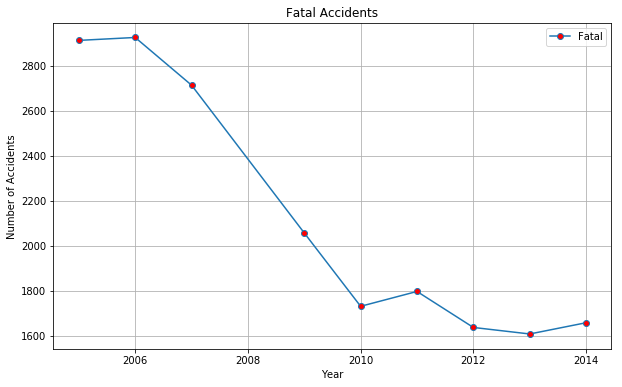

In [42]:
plt.figure(figsize=(10,6))
plot(fatal_severe_yearwise['Fatal'], marker='o', markerfacecolor='red', label='Fatal')
plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Fatal Accidents')

Text(0,0.5,'Number of Accidents')

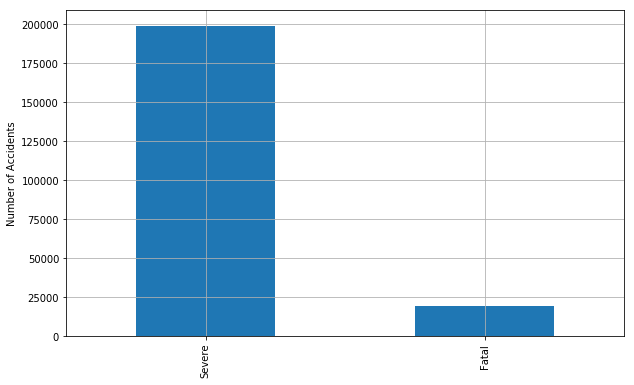

In [43]:
plt.figure(figsize=(10,6))
severe_accidents['Accident_Severity'].value_counts().plot(kind='bar')
plt.grid()
plt.ylabel('Number of Accidents')

Severe accidents count by month

In [44]:
severe_accidents['Month'] = severe_accidents['Date'].map(lambda x: x.month)
severe_accidents['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)

C:\Users\rocki\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rocki\Anaconda2\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [45]:
severe = severe_accidents[severe_accidents['Accident_Severity'] == 'Severe']
fatal = severe_accidents[severe_accidents['Accident_Severity'] == 'Fatal']

# Trend by Month

Text(0,0.5,'Number of Severe Accidents')

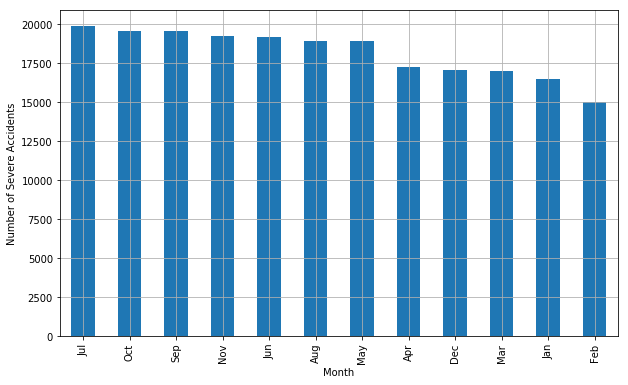

In [46]:
plt.figure(figsize=(10,6))
severe_accidents['Month'].value_counts().plot(kind='bar', stacked=True)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Number of Severe Accidents')

Only Severe

In [ ]:
plt.figure(figsize=(10,6))
severe['Month'].value_counts().plot(kind='bar', stacked=True)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Number of Severe Accidents')

In [ ]:
plt.figure(figsize=(10,6))
fatal['Month'].value_counts().plot(kind='bar', stacked=True)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Number of Severe Accidents')

In [ ]:
severe_monthwise = pd.pivot_table(severe_accidents, index='Month', columns='Accident_Severity', values='Accident_Index', aggfunc='count')

In [ ]:
severe_monthwise.plot(kind='bar', figsize=(10,6))
plt.grid()

In [ ]:
severe_monthwise['Fatal'].plot(kind='bar', figsize=(10,6))
plt.grid()

In [ ]:
severe_monthwise['Severe'].plot(kind='bar', figsize=(10,6))
plt.grid()

# Day of the Week

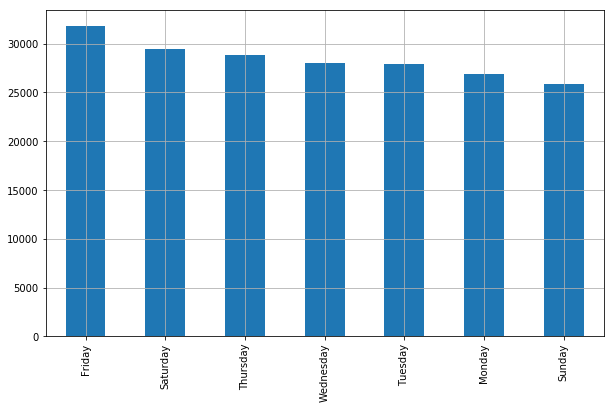

In [47]:
plt.figure(figsize=(10,6))
severe['Day_of_Week'].value_counts().plot(kind='bar')
plt.grid()

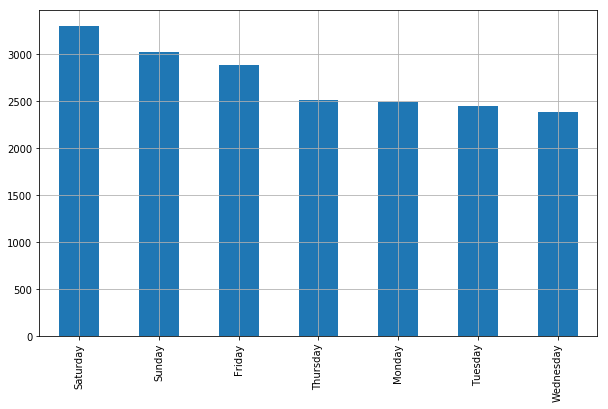

In [48]:
plt.figure(figsize=(10,6))
fatal['Day_of_Week'].value_counts().plot(kind='bar')
plt.grid()

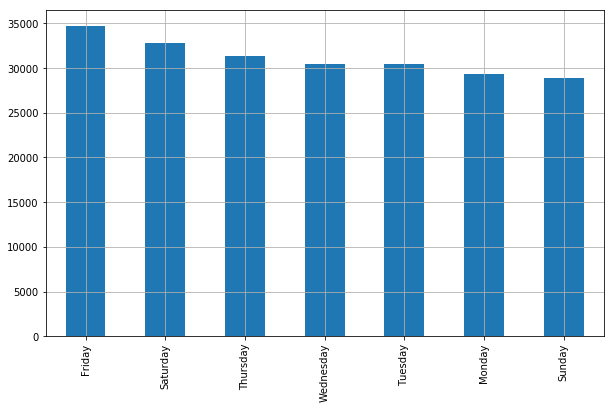

In [49]:
plt.figure(figsize=(10,6))
severe_accidents['Day_of_Week'].value_counts().plot(kind='bar')
plt.grid()

# Trend Based on hour

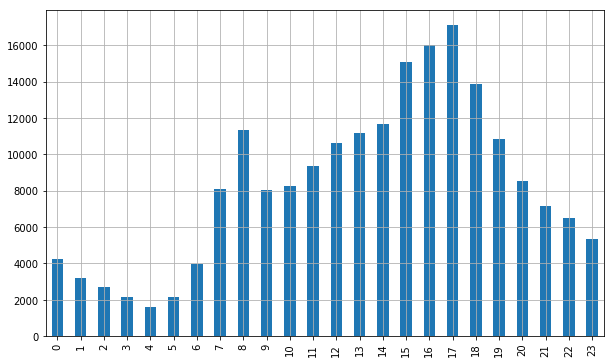

In [50]:
plt.figure(figsize=(10,6))
severe['Hour'].value_counts().sort_index().plot(kind='bar')
plt.grid()

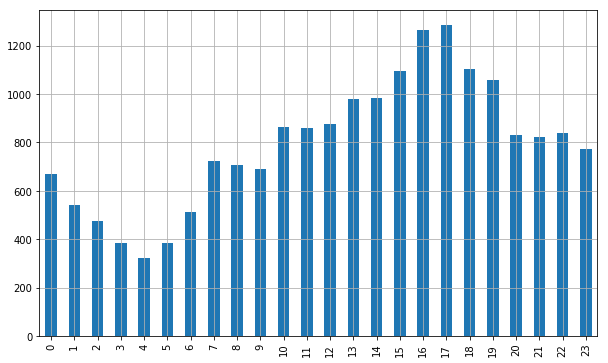

In [51]:
plt.figure(figsize=(10,6))
fatal['Hour'].value_counts().sort_index().plot(kind='bar')
plt.grid()

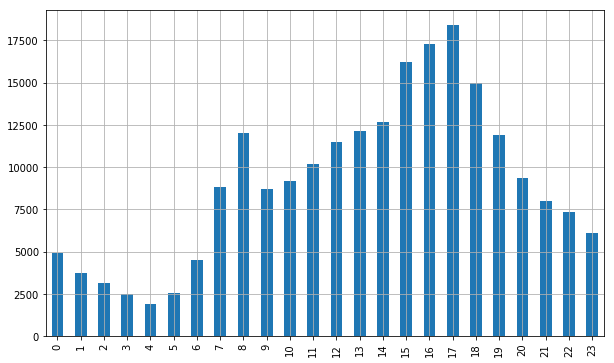

In [52]:
plt.figure(figsize=(10,6))
severe_accidents['Hour'].value_counts().sort_index().plot(kind='bar')
plt.grid()

In [53]:
severe_accidents['Day_of_Week'].unique()

array(['Tuesday', 'Thursday', 'Saturday', 'Wednesday', 'Friday', 'Monday',
       'Sunday'], dtype=object)

In [54]:
df = pd.pivot_table(severe_accidents, index='Hour', columns='Day_of_Week', values='Accident_Index', aggfunc='count')

# Trend across days with hour

In [55]:
Monday = severe_accidents[severe_accidents['Day_of_Week'] == 'Monday']
Tuesday = severe_accidents[severe_accidents['Day_of_Week'] == 'Tuesday']
Wednesday = severe_accidents[severe_accidents['Day_of_Week'] == 'Wednesday']
Thursday = severe_accidents[severe_accidents['Day_of_Week'] == 'Thursday']
Friday = severe_accidents[severe_accidents['Day_of_Week'] == 'Friday']
Saturday = severe_accidents[severe_accidents['Day_of_Week'] == 'Saturday']
Sunday = severe_accidents[severe_accidents['Day_of_Week'] == 'Sunday']

In [56]:
weekdays = pd.concat([Monday, Tuesday, Wednesday, Thursday, Friday])
weekends = pd.concat([Saturday, Sunday])

# Obs1:# 
There is an increase in the % of accidents on Weekdays 3PM to 5PM. We dont observe this during Weekends. Traffic more. People returning from work ?

# Obs2:#
Relative to weekdays, oberving high % during late night and early morning hours. Possible drunk and drive ?

In [57]:
weekdays = pd.concat([Monday, Tuesday, Wednesday, Thursday, Friday])
weekends = pd.concat([Saturday, Sunday])

In [58]:
weekends.head(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Hour,Wind,Month
19,200501BS00022,526790.0,178980.0,-0.174925,51.495498,1,Severe,1,1,2005-01-08,...,Dry,None,None,1,Yes,E01002821,2005,3,No,Jan
91,200501BS70073,525000.0,180660.0,-0.200102,51.510995,1,Severe,2,1,2005-03-05,...,Wet/Damp,None,None,1,Yes,E01002882,2005,18,No,Mar
170,200501BS70166,525420.0,179500.0,-0.194465,51.500477,1,Severe,1,1,2005-04-16,...,Dry,None,None,1,Yes,E01002816,2005,20,No,Apr


In [59]:
weekday_index = np.sort( weekdays['Hour'].unique())
weekend_index = np.sort( weekends['Hour'].unique())

weekday_values = weekdays['Hour'].value_counts().sort_index()
weekend_values = weekends['Hour'].value_counts().sort_index()
weekday_values = (weekday_values/weekday_values.sum())*100
weekend_values = (weekend_values/weekend_values.sum())*100

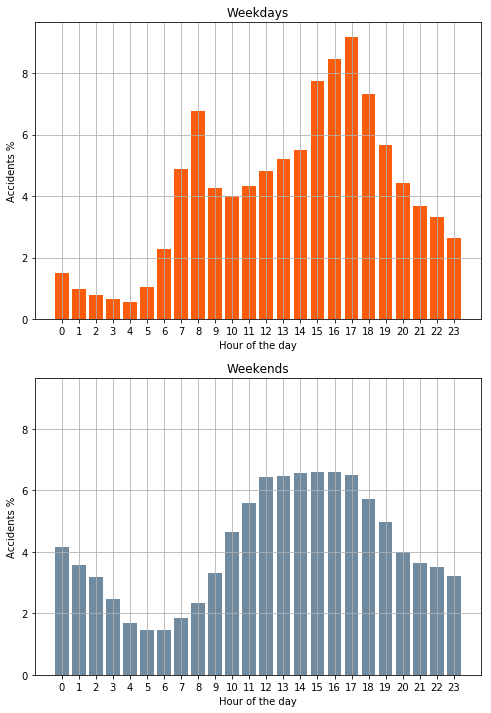

In [68]:
fig, (ax1, ax2) = subplots(nrows=2,ncols=1,sharex=False,sharey=True,figsize=(8,12))

ax1.bar(weekday_index, weekday_values, color='#FB5C0C', alpha=1)
ax1.set_title('Weekdays')
ax1.set_ylabel('Accidents %')
ax1.set_xlabel('Hour of the day')
ax1.set_facecolor('white')
ax1.set_xticks(list(range(0,24)))
ax1.grid()

ax2.bar(weekend_index, weekend_values, color='#708BA0')
ax2.set_title('Weekends')
ax2.set_ylabel('Accidents %')
ax2.set_xlabel('Hour of the day')
ax2.set_facecolor('white')
ax2.set_xticks(list(range(0,24)))
ax2.grid()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Number_of_Vehicles', y='Number_of_Casualties',data=severe_accidents, hue='Accident_Severity', style='Accident_Severity', size='Accident_Severity', sizes=[100,50], palette='Dark2') 
plt.xlim(0,25)
plt.ylim(0,60)
show()